In [1]:
#Basics
#import data_config
import logging
import os
import sys
import warnings
warnings.filterwarnings("ignore")

# Calc Tools
import numpy as np
import pandas as pd
import xarray as xr


# Change path to working script directory
current_path=os.getcwd()
print(current_path)
major_path = os.path.abspath("../../../")
base_working_path=major_path+"/my_GIT/Synthetic_Airborne_Arctic_ARs"
aircraft_base_path=major_path+"/Work/GIT_Repository/"
working_path  = base_working_path+"/src/"
script_path   = base_working_path+"/scripts/"
major_script_path   = base_working_path+"/major_scripts/"

config_path   = base_working_path+"/config/"
plotting_path = base_working_path+"/plotting/"

sys.path.insert(1, os.path.join(sys.path[0], working_path))
sys.path.insert(2,os.path.join(sys.path[0],script_path))
sys.path.insert(3,os.path.join(sys.path[0],major_script_path))
sys.path.insert(4, os.path.join(sys.path[0], config_path))
sys.path.insert(5, os.path.join(sys.path[0], plotting_path))

print(working_path)
os.chdir(working_path)
#Basics
import data_config
# Relevant created classes and modules
import flightcampaign as Flight_Campaign
from flightmapping import FlightMaps
from atmospheric_rivers import Atmospheric_Rivers

#Grid Data
from reanalysis import ERA5,CARRA 
#from ICON import ICON_NWP as ICON
import gridonhalo

# Run routines
import run_grid_data_on_halo # to run single days
import campaignAR_plotter # to run analysis for sequence of single days and create combined plots

# IVT variability
from ivtvariability import IVT_Variability_Plotter
#------------------------------------------------------------------------------#
# Plot scripts
import matplotlib.pyplot as plt

try:
    from typhon.plots import styles
except:
    print("Typhon module cannot be imported")

import interpdata_plotting
from moisturebudget import Moisture_Budget_Plots as Budget_plots
#-----------------------------------------------------------------------------#
#sys.exit()
# Config File
config_file=data_config.load_config_file(aircraft_base_path,"data_config_file")

analyse_all_flights=True

#
flight_dates={"North_Atlantic_Run":
              {"SRF02":"20180224",
               "SRF04":"20190319",#},
               "SRF07":"20200416",#},
               "SRF08":"20200419"
              },
              "Second_Synthetic_Study":
              {"SRF02":"20110317",
               "SRF03":"20110423",
               "SRF08":"20150314",
               "SRF09":"20160311",
               "SRF12":"20180225"
               }}

C:\Users\u300737\Desktop\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks
C:\Users\u300737\Desktop\PhD_UHH_WIMI/my_GIT/Synthetic_Airborne_Arctic_ARs/src/
C:\Users\u300737\Desktop\PhD_UHH_WIMI/Work/GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI/Work/GIT_Repository//data_config_file.ini.ini  already exists


In [2]:
# Major configurations
do_plotting=False

campaign="North_Atlantic_Run" 
# 
calc_hmp=True
calc_hmc=False
# What to use
use_era=False
use_carra=True
use_icon=False
if analyse_all_flights:
    campaign="North_Atlantic_Run" 
  
    flights=[*flight_dates[campaign].keys()]
    
    NA_Hydrometeors,NA_HALO_Dict,cmpgn_cls=campaignAR_plotter.main(campaign=campaign,flights=flights,
                                          era_is_desired=use_era, 
                                          icon_is_desired=use_icon,
                                          carra_is_desired=use_carra,
                                          do_daily_plots=do_plotting,
                                          calc_hmp=calc_hmp,calc_hmc=calc_hmc)
    campaign="Second_Synthetic_Study"#
    flights=[*flight_dates[campaign].keys()]
    SND_Hydrometeors,SND_HALO_Dict,cmpgn_cls=campaignAR_plotter.main(campaign=campaign,flights=flights,
                                          era_is_desired=use_era, 
                                          icon_is_desired=use_icon,
                                          carra_is_desired=use_carra,
                                          do_daily_plots=do_plotting,
                                          calc_hmp=calc_hmp,calc_hmc=calc_hmc)
else:
    
    Hydrometeors,HALO_Dict,cmpgn_cls=campaignAR_plotter.main(campaign=campaign,flights=flights,
                                          era_is_desired=use_era, 
                                          icon_is_desired=use_icon,
                                          carra_is_desired=use_carra,
                                          do_daily_plots=do_plotting,
                                          calc_hmp=calc_hmp,calc_hmc=calc_hmc)

    HMCs,HALO_Dict,cmpgn_cls=campaignAR_plotter.main(campaign=campaign,flights=flights,
                                          era_is_desired=use_era, 
                                          icon_is_desired=use_icon,
                                          carra_is_desired=use_carra,
                                          do_daily_plots=do_plotting,
                                          calc_hmp=False,calc_hmc=True)
if analyse_all_flights:
    key_list=[*NA_Hydrometeors.keys()]
    for key in key_list:
        new_dict_entry=int(flight_dates["North_Atlantic_Run"][key])
        print(new_dict_entry)
        NA_Hydrometeors[new_dict_entry]=NA_Hydrometeors[key]
        NA_HALO_Dict[new_dict_entry]=NA_HALO_Dict[key]
        del NA_Hydrometeors[key], NA_HALO_Dict[key]

    key_list=[*SND_Hydrometeors.keys()]
    for key in key_list:
        new_dict_entry=int(flight_dates["Second_Synthetic_Study"][key])
        SND_Hydrometeors[new_dict_entry]=SND_Hydrometeors[key]
        SND_HALO_Dict[new_dict_entry]=SND_HALO_Dict[key]
        del SND_Hydrometeors[key], SND_HALO_Dict[key]

    campaign_Hydrometeors= dict(list(NA_Hydrometeors.items()) + list(SND_Hydrometeors.items()))
    campaign_Hydrometeors=dict(sorted(campaign_Hydrometeors.items()))

    campaign_HALO = dict(list(NA_HALO_Dict.items()) + list(SND_HALO_Dict.items())) 
    campaign_HALO=dict(sorted(campaign_HALO.items()))

    grid_name=SND_Hydrometeors[new_dict_entry]["AR_internal"].name
else:
    grid_name=Hydrometeors[new_dict_entry]["AR_internal"].name

#ar_of_day="SAR_internal"
#working_path=os.getcwd()
#analysed_flight="SRF02"
#print(campaign_Hydrometeors.keys())
#print(campaign_HALO.keys())

C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini.ini  already exists
Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/NA_February_Run/
C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini.ini  already exists
Analyse given flight:  SRF02
No data is plotted.
Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/NA_February_Run/
Entries:  dict_keys(['data']) have added to or changed in the config file
Synthetic flight track loaded
This none dataset of the flight campaign.
No airborne datasets will be integrated.
Path to open:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/NA_February_Run//data/ERA-5/
open hydrometeor_levels
Load calculated vert

C:\Users\u300737\Desktop\PhD_UHH_WIMI/Work/Synthetic_AR_Paper/Manuscript/Paper_Plots/
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029DDFA54D60>
520.0753417231155
499.496433588258
668.7831340114934
337.17545282867167
448.0837470433081
417.1175752616131
323.6011511734171
314.35197900722653
444.1829680097085
Figure saved as: C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/Second_Synthetic_Study/plots/Fig12_CARRA_AR_TIVT_cases_overview.pdf


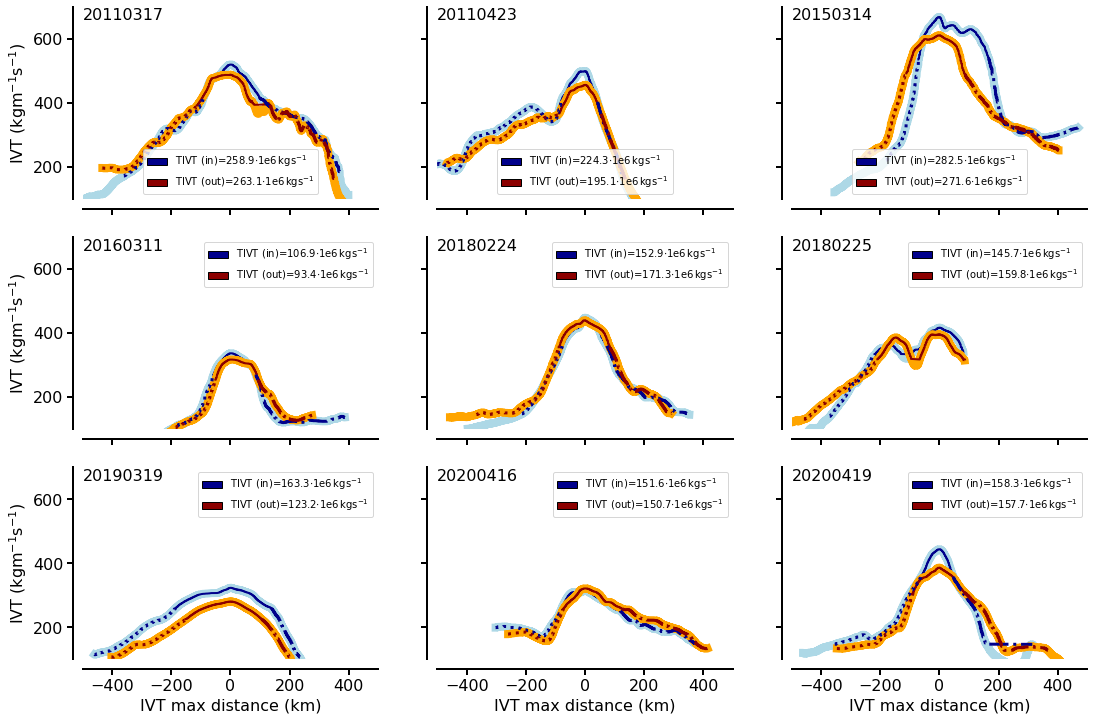

In [3]:
manuscript_plot_path=major_path+"/Work/"+"Synthetic_AR_Paper/Manuscript/Paper_Plots/"
print(manuscript_plot_path)
if analyse_all_flights:
    IVT_Variability_Plotter.multiplot_inflow_outflow_IVT_sectors(cmpgn_cls,campaign_HALO,campaign_Hydrometeors,
                                                                 grid_name,plot_path=manuscript_plot_path)